In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
import numpy as np
import shap

# Load the Breast Cancer Data

see: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
breast_cancer_data = load_breast_cancer()

# Print Description of Breast Cancer Dataset

In [3]:
print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Split Data to Dataset and Labels

In [4]:
x = breast_cancer_data['data']
y = breast_cancer_data['target']

# Print Shape of Data

In [5]:
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (569, 30)
y.shape (569,)


# Split Data to Train and Test Set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (455, 30)
y_train.shape: (455,)
x_test.shape: (114, 30)
y_test.shape: (114,)


No need to do scaling with gradient boosted trees

# Train a binary Classifier Model with lightGBM

The hyperparameters have been found with [Hyperopt](https://github.com/hyperopt/hyperopt). Hyperopt is a distributed automatic hyperparameter optimization tool. For demo purposes and simplicity this automatic hyperparameter optimization is not shown here.

In [7]:
evals_result = {}

train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

param = {
        'objective':'binary',
        'metric': 'auc',        
        'bagging_fraction': 0.33276400243707893, 
        'bagging_freq': 4, 
        'feature_fraction': 0.7120783095009242, 
        'min_data_in_leaf': 54, 
        'num_leaves': 67,
        }

bst = lgb.train(
        param, 
        train_data, 
        valid_sets=[test_data], 
        num_boost_round  = 1000,
        early_stopping_rounds=10, 
        verbose_eval=False,
        evals_result=evals_result,
        )

# Print AUC Value of Classifier

With an AUC value of 1.0 we found a perfect binary classifier.

In [8]:
print('AUC Value:', max(evals_result['valid_0']['auc']))

AUC Value: 1.0


# Calculate SHAP Values to Explain the Model

In [9]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_test)

# because we have a binary classification we only want to consider the shap values for one class
# shap values for the other class are the same (for binary classification)
shap_values = shap_values[0]

c:\users\phmay\appdata\local\continuum\miniconda3\envs\tf2\lib\site-packages\shap\explainers\tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


# SHAP values as a Bar Chart

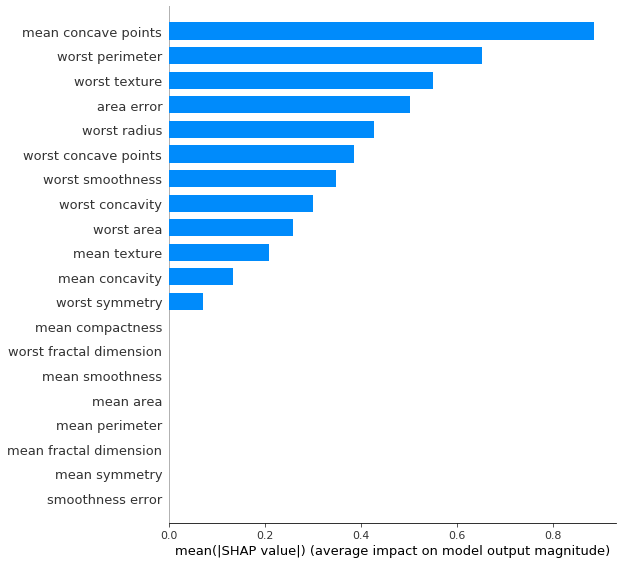

In [10]:
shap.summary_plot(shap_values, x_test, breast_cancer_data['feature_names'], plot_type='bar')

# SHAP Values can also be printed as numeric Values

## Calculate them

In [11]:
feature_importance = np.mean(np.abs(shap_values), axis=0)

## Sort them by value

In [12]:
sort_indexes = np.flip(np.argsort(feature_importance))
sorted_feature_names = breast_cancer_data['feature_names'][sort_indexes]
sorted_feature_importance = feature_importance[sort_indexes]

## Print them

In [13]:
for line in list(zip(sorted_feature_names, sorted_feature_importance)):
    print(line)

('mean concave points', 0.8868459625914457)
('worst perimeter', 0.6516800264653536)
('worst texture', 0.5497226072671101)
('area error', 0.503295842600643)
('worst radius', 0.4268413611871639)
('worst concave points', 0.3858430827997238)
('worst smoothness', 0.3473722013741144)
('worst concavity', 0.30070989274213045)
('worst area', 0.2573667665273845)
('mean texture', 0.20728424447677746)
('mean concavity', 0.13289047945295218)
('worst symmetry', 0.07073308977908038)
('mean compactness', 0.0)
('worst fractal dimension', 0.0)
('mean smoothness', 0.0)
('mean area', 0.0)
('mean perimeter', 0.0)
('mean fractal dimension', 0.0)
('mean symmetry', 0.0)
('smoothness error', 0.0)
('radius error', 0.0)
('texture error', 0.0)
('perimeter error', 0.0)
('compactness error', 0.0)
('concavity error', 0.0)
('concave points error', 0.0)
('symmetry error', 0.0)
('fractal dimension error', 0.0)
('worst compactness', 0.0)
('mean radius', 0.0)
